# Data Exploration part 2

Let's continue to explora our data and see if we can improve our model later.

In [ ]:
# imports
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from numpy import mean
from numpy import std
from numpy import percentile
import pandas as pd
import scipy

# get data
!wget --no-check-certificate \
    -O /tmp/sentiment.csv https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P

# define get_data function
def get_data(path):
  data = pd.read_csv(path, index_col=0)
  return data

#get the data
data = get_data('/tmp/sentiment.csv')

# clone package repository
!git clone https://github.com/vallantin/atalaia.git

# navigate to atalaia directory
%cd atalaia

# install packages requirements
!pip install -r requirements.txt

# install package
!python setup.py install

# import it
from atalaia.atalaia import Atalaia

--2020-07-11 08:24:06--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 74.125.142.101, 74.125.142.102, 74.125.142.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/umhbcniav9ldc80gevb1dovbg8eg2209/1594455825000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2020-07-11 08:24:06--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/umhbcniav9ldc80gevb1dovbg8eg2209/1594455825000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)|74.125

Last time, we saw we had what seemed to be an outlier sentence, bigger than the average size. Let's see it again.

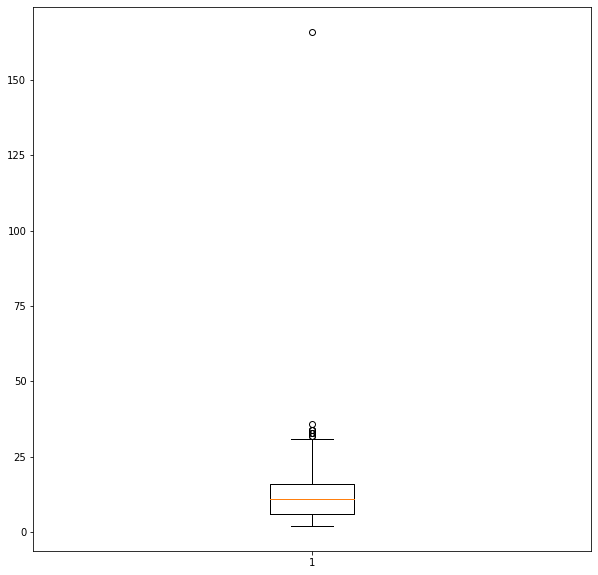

In [ ]:
# get a list with all the texts
texts = data.text
#start atalaia
atalaia = Atalaia('en')

# get the number of tokens in each sentence
# get the lengths
lens = [len(atalaia.tokenize(t)) for t in texts]
data['lengths'] = lens
 
# plot
plt.figure(figsize=(10,10))
plt.boxplot(data.lengths)
plt.show()

Before defining the was as we will look for outliers, it's a good idea to check if we have a normal distribution here. It seems that data is not normal.

In [ ]:
k2, p = scipy.stats.normaltest(lens)
alpha = 0.05

if p < alpha:  # null hypothesis: the sentences come from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


The null hypothesis can be rejected


For the cases where we have a non-Gaussian distribution sample of data, we can use the Interquartile Range (IQR). It is calculated as the difference between the 75th and the 25th percentiles of the data.

In [ ]:
# calculate interquartile range
q25 = percentile(data.lengths, 25)
q75 = percentile(data.lengths, 75)
iqr = q75 - q25

# calculate the cutoff
cutoff = iqr * 1.5
lower  = q25 - cutoff
upper  = q75 + cutoff

# identify outliers
texts = data.text
outliers = [texts[i] for i, text_len in enumerate(lens) if text_len < lower or text_len > upper ]
outliers

["Best I've found so far .... I've tried 2 other bluetooths and this one has the best quality (for both me and the listener) as well as ease of using.",
 'I even fully charged it before I went to bed and turned off blue tooth and wi-fi and noticed that it only had 20 % left in the morning.',
 'My experience was terrible..... This was my fourth bluetooth headset and while it was much more comfortable than my last Jabra (which I HATED!!!',
 'But now that it is "out of warranty" the same problems reoccure.Bottom line... put your money somewhere else... Cingular will not support it.',
 "Bland... Not a liking this place for a number of reasons and I don't want to waste time on bad reviewing.. I'll leave it at that...",
 'As for the "mains also uninspired.\t0\nThis is the place where I first had pho and it was amazing!!\t1\nThis wonderful experience made this place a must-stop whenever we are in town again.\t1\nIf the food isn\'t bad enough for you, then enjoy dealing with the world\'s worst

Notice that one of the observations is not a single sentence! If you take a look at the 6th one, you will see that it contains multiple sentences and multiple sentiments (\t0 or \t1).

Let's check what's the sentiment assigned to this long "sentence" in our dataset

In [ ]:
data[data.text == outliers[5]]

,text,sentiment,lengths
1228,"As for the ""mains also uninspired.\t0\nThis is...",0,166


As you can see:

- We have 8 individual sentences in a single row. 
- 3 of them are positive
- But all of them  are considered as negative...

What ifthis is happening in other rows too? Let's try to find other rows with similar problem.

In [ ]:
data[data.text.str.contains('\t1|\t0', regex= True, na=False)]

,text,sentiment,lengths
1228,"As for the ""mains also uninspired.\t0\nThis is...",0,166


So, only this row has this problem. Let's exclude it to keep it simple.

In [ ]:
data = data.drop(index = [1228])

If we replot the boxplot, we can see that the really long sentence is gone. We didin't get rid of the other ones, that's why you still can see the 4 dots on the top of the box.

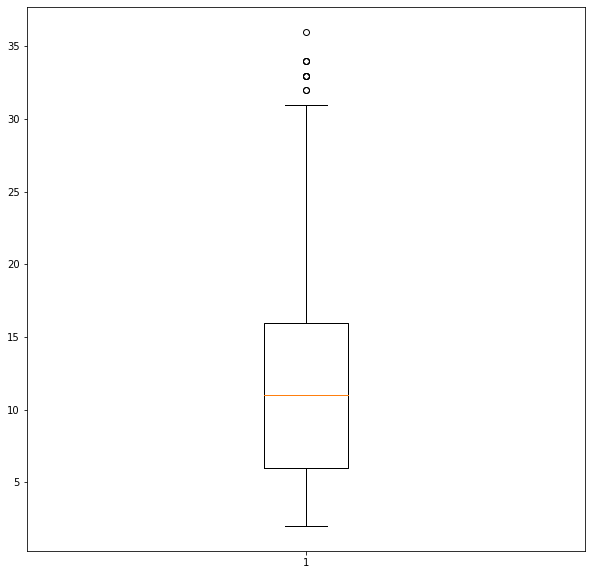

In [ ]:
# plot
plt.figure(figsize=(10,10))
plt.boxplot(data.lengths)
plt.show()